In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import utilsCM
from tqdm import tqdm

In [2]:
#Load word2sense
#already preprocessed in MATLAB so that Wrd2Sns and THINGs overlap --> we have IMAGES, LABELS and SENSES
pathtofile = '../../../data-07/'
Y_embeddings_subset = pd.read_csv(pathtofile + "ThingsWrd2Sns_subset.txt", sep=",",index_col = 0)
# Y_embeddings = Y_embeddings.values[:,1:Y_embeddings.shape[1]-1].astype(np.float)

In [3]:
WIpath = '../../../data-04/'
nsample = 12
WrdThingsInfo = pd.read_csv(WIpath + 'KeptTHINGSInfo_n' + str(nsample) +'.csv',sep=',',index_col = 0)

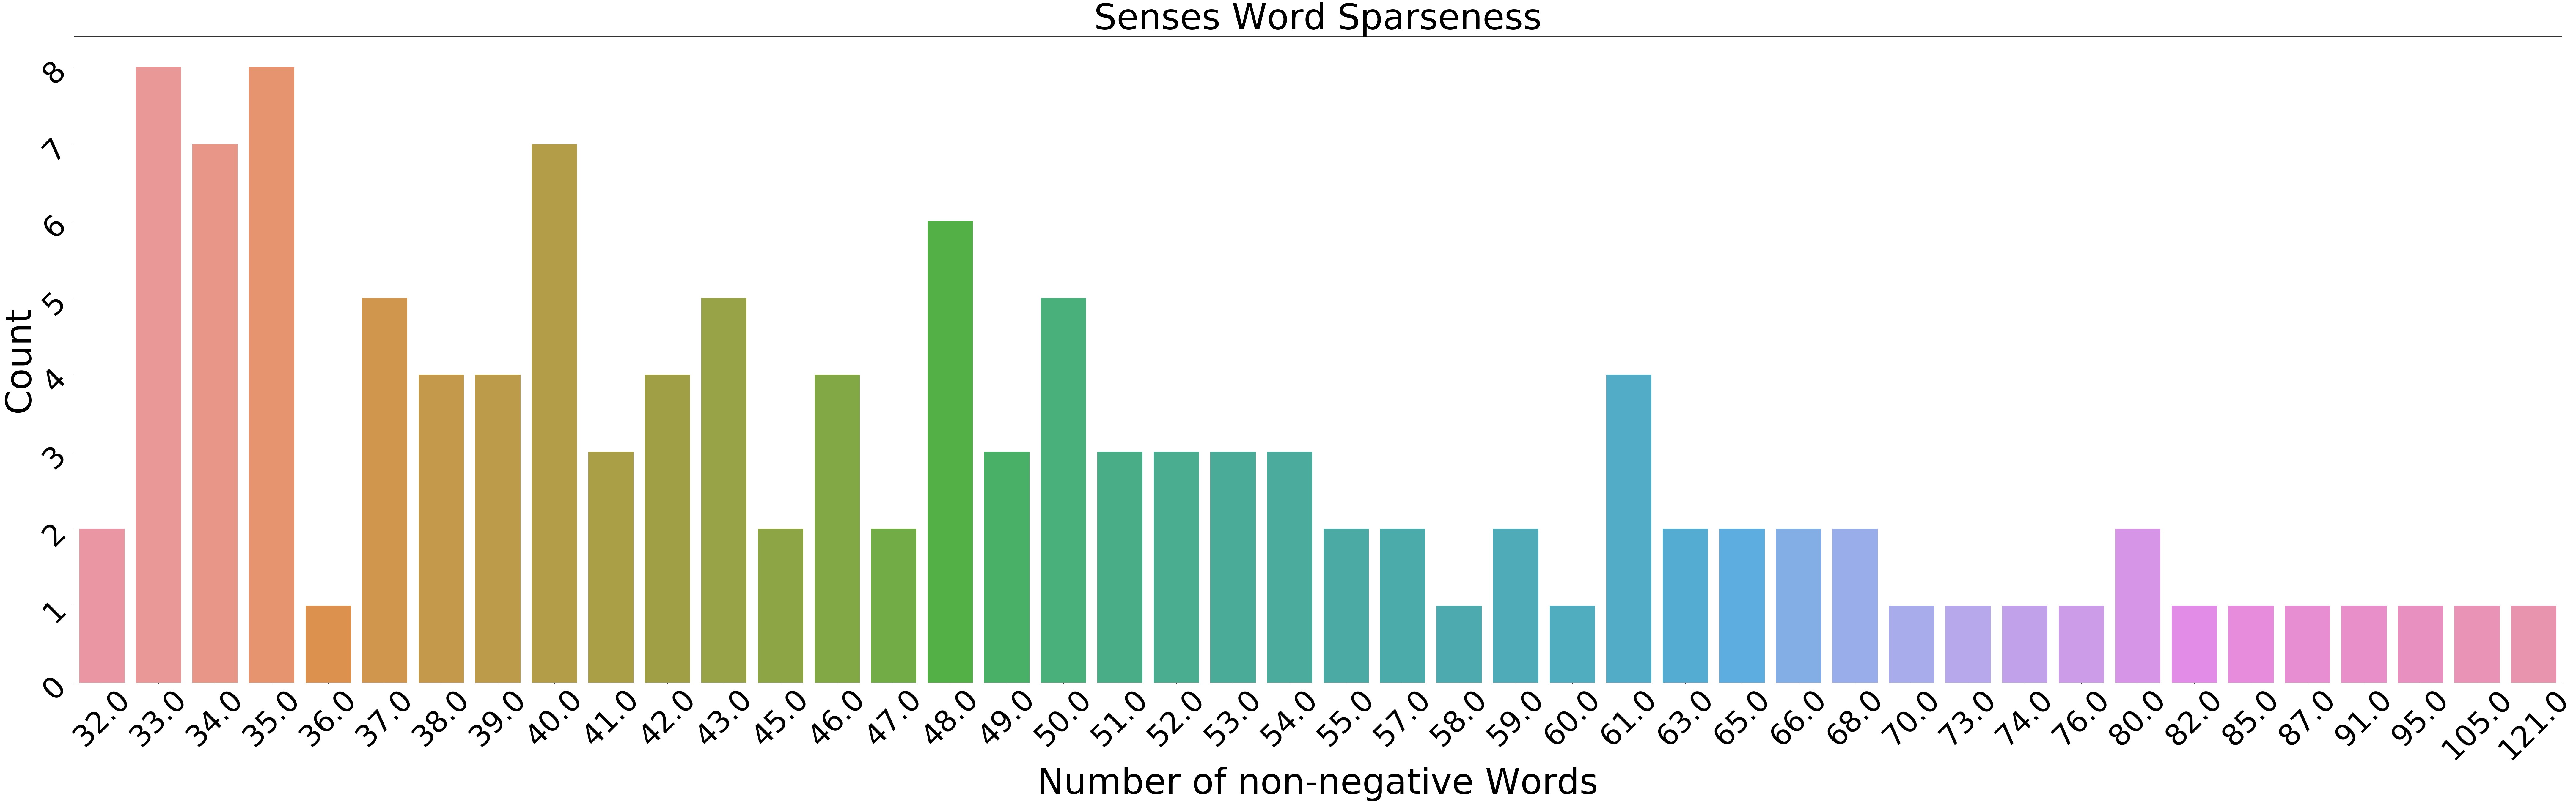

35.0     8
33.0     8
40.0     7
34.0     7
48.0     6
43.0     5
37.0     5
50.0     5
42.0     4
46.0     4
38.0     4
61.0     4
39.0     4
53.0     3
51.0     3
54.0     3
49.0     3
41.0     3
52.0     3
65.0     2
66.0     2
45.0     2
63.0     2
47.0     2
32.0     2
57.0     2
55.0     2
68.0     2
59.0     2
80.0     2
95.0     1
91.0     1
105.0    1
87.0     1
121.0    1
85.0     1
36.0     1
76.0     1
74.0     1
82.0     1
73.0     1
58.0     1
60.0     1
70.0     1
Name: 0, dtype: int64

In [4]:
#Plotting senses sparseness
##This may reqiure elininating very sparse senses.
import seaborn as sns
import matplotlib.pyplot as plt

Count_Y = np.zeros(Y_embeddings_subset.shape)
Count_Y[Y_embeddings_subset>0] = 1

countsum = np.sum(Count_Y, axis=0)
countsum
countsum = pd.DataFrame(data=countsum)


plt.figure(figsize = (150,40))
c = sns.countplot(x=countsum[0], data=countsum)
c.axes.set_title("Senses Word Sparseness",fontsize=120)
c.set_xlabel("Number of non-negative Words",fontsize=120)
c.set_ylabel("Count",fontsize=120)
c.tick_params(labelsize=100, labelrotation = 45)
plt.show()

countsum[0].value_counts()
# .sorted_values()

vec:  (6191,)
Y:  (6191,)


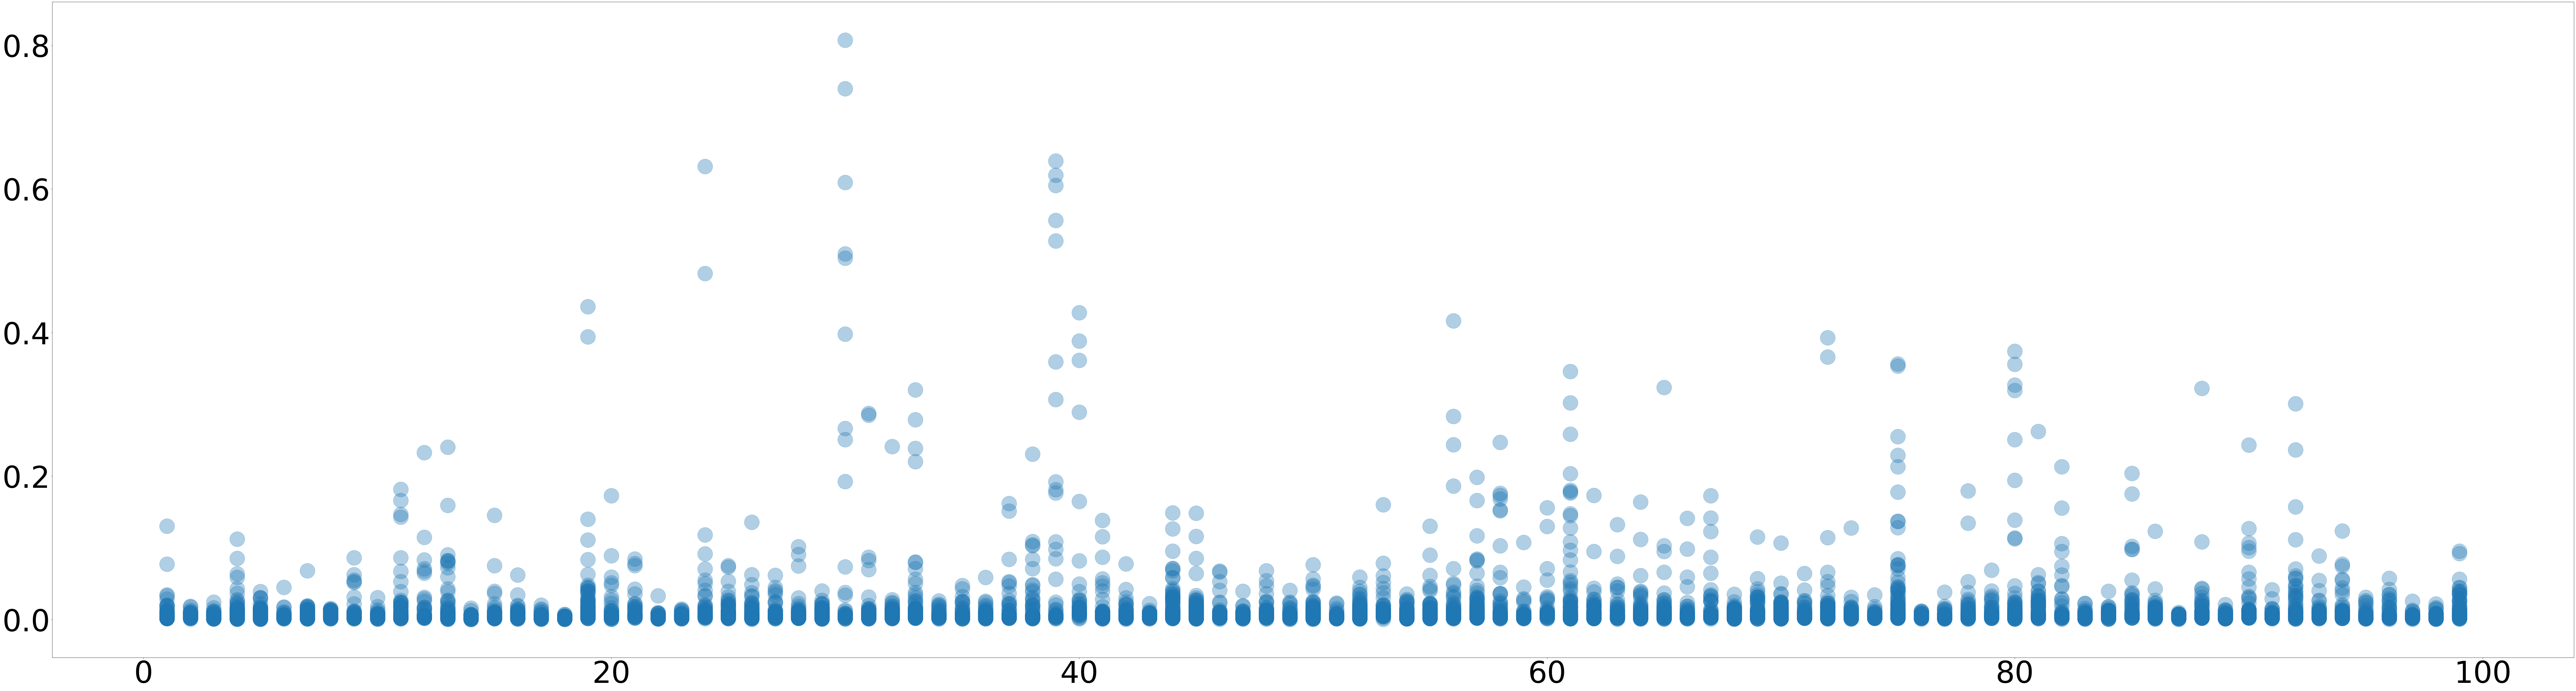

In [5]:
#Plotting senses to make sure relationship is not binary



vec = np.tile(1, Y_embeddings_subset.shape[0])

for i in range(2,Y_embeddings_subset.shape[1]+1):
    vec = np.append(vec,np.tile(i, Y_embeddings_subset.shape[0])) 
    
Y_embeddings_subset_vec = Y_embeddings_subset.values[:,:].flatten('F')

#eliminate zero elements for scatterplot
vec = vec[Y_embeddings_subset_vec != 0]
Y_embeddings_subset_vec = Y_embeddings_subset_vec[Y_embeddings_subset_vec != 0]
print('vec: ',vec.shape)
print('Y: ',Y_embeddings_subset_vec.shape)

senses = np.concatenate((vec.reshape(-1,1),Y_embeddings_subset_vec.reshape(-1,1)),axis=1)
senses
senses = pd.DataFrame(senses)

plt.figure(figsize = (150,40))
plt.rcParams.update({'font.size': 100})
plt.scatter(vec[vec<100],Y_embeddings_subset_vec[vec<100],s=2500,alpha =0.35)#, x="total_bill", y="tip")
plt.show()

In [6]:
Y_embeddings_subset = Y_embeddings_subset.values[:,:].astype(np.float)


In [7]:
layer =  {'conv_1','conv_5','fc_3'}

Sub = [1,2,3,4]


pretrained_val = True

datapath = '../../../data-00/'
savepath = '../../../data-08/'



In [11]:
ROI = {'EVC','ObjectROI'}
# ROI = {'EVC'}
keyword = {'DNNActvtn','ROIpred'}
# keyword = {'ROIpred'}
Keepncomps = list(range(2,42,2))
# Keepncomps = [2]
pretrained_val = True


for ikeyword in keyword:
    for ilayer in layer:
        
        if ikeyword is 'ROIpred':
            
            for iROI in ROI: 
                predictor_variable = {}
                for iSub in Sub:
                    if not pretrained_val:
                        thisSub = np.load(datapath +  "ROIpred_Sub" + str(iSub) + '_' + iROI + "_" + ilayer + '_untrained.npy')
                    else:
                        thisSub = np.load(datapath +  "ROIpred_Sub" + str(iSub) + '_' + iROI + "_" + ilayer + '.npy')
                            
                    #load ROIpred as predictor variable
                    if iSub is 1:
                        predictor_variable = thisSub
                    else:
                        predictor_variable = np.append( predictor_variable , thisSub, axis = 1)
                    
                predictor_variable_sub = predictor_variable[WrdThingsInfo['old_index']]
                    

                for icomps in Keepncomps:
                    if pretrained_val:
                        filename = 'PredictSENSES_' + ikeyword + '_' +iROI + '_'+ ilayer + '_'+ str(icomps) +'PCs'
                    else:
                        filename = 'PredictSENSES_' + ikeyword + '_' +iROI + '_'+ ilayer + '_'+ str(icomps) +'PCs_untrained'
                    if not os.path.isfile(savepath + filename + '.npy'):
                        mean_r = utilsCM.iter_cvregress(predictor_variable_sub,Y_embeddings_subset,ikeyword,ilayer,icomps,iROI,savefolder = savepath, pretrained = pretrained_val)
#                     utilsCM.make_figure(mean_r,ikeyword,ilayer,icomps,iROI, figurepath = 'figures-05/')
#                     print(mean_r)
        
        
        elif ikeyword is 'DNNActvtn':            
            if not pretrained_val:
                predictor_variable = pd.read_csv(datapath +  "things_" + ilayer + '_untrained.csv', header=None, index_col=0).iloc[:,:].to_numpy()
            else:
                predictor_variable = pd.read_csv(datapath +  "things_" + ilayer + '.csv', header=None, index_col=0).iloc[:,:].to_numpy()

            predictor_variable_sub = predictor_variable[WrdThingsInfo['old_index']]

            for icomps in Keepncomps:
                if pretrained_val:
                    filename = 'PredictSENSES_' + ikeyword + '_'+ ilayer + '_'+ str(icomps) +'PCs'
                else:
                    filename = 'PredictSENSES_' + ikeyword +  '_'+ ilayer + '_'+ str(icomps) +'PCs_untrained'
                    
                if not os.path.isfile(savepath + filename + '.npy'):
                    mean_r = utilsCM.iter_cvregress(predictor_variable_sub,Y_embeddings_subset,ikeyword,ilayer,icomps,savefolder = savepath, pretrained = pretrained_val)
                
#                 utilsCM.make_figure(mean_r,ikeyword,ilayer,icomps, figurepath = 'figures-05/')

k-fold regression, independet variable: 2 PCs retained of ROIpred from EVC
k-fold regression, independet variable: 4 PCs retained of ROIpred from EVC
k-fold regression, independet variable: 6 PCs retained of ROIpred from EVC
k-fold regression, independet variable: 8 PCs retained of ROIpred from EVC
k-fold regression, independet variable: 10 PCs retained of ROIpred from EVC
k-fold regression, independet variable: 12 PCs retained of ROIpred from EVC
k-fold regression, independet variable: 14 PCs retained of ROIpred from EVC
k-fold regression, independet variable: 16 PCs retained of ROIpred from EVC
k-fold regression, independet variable: 18 PCs retained of ROIpred from EVC
k-fold regression, independet variable: 20 PCs retained of ROIpred from EVC
k-fold regression, independet variable: 22 PCs retained of ROIpred from EVC
k-fold regression, independet variable: 24 PCs retained of ROIpred from EVC
k-fold regression, independet variable: 26 PCs retained of ROIpred from EVC
k-fold regressio

In [12]:
tresh_bonf = utilsCM.p2r(.05/Y_embeddings_subset.shape[1], Y_embeddings_subset.shape[0])
figurepath='../../../figures-08/'

ROI = {'EVC','ObjectROI'}
keyword = {'DNNActvtn','ROIpred'}
Keepncomps = list(range(2,42,2))
pretrained_val = True

In [13]:
from  matplotlib import pyplot
import seaborn as sns
from pandas import DataFrame as pddf

savepath = '../../../data-08/'
figurepath = '../../../figures-08/'
layer = {'fc_3'}
pretrained_vec = [True, False]
##Showing histograms for senses above threshold

myDict_count = {}
myDict_mean = {}
myDict_max = {}
myDict_median = {}


for ilayer in layer:
    for pretrained_val in pretrained_vec:
        for ikeyword in keyword:            
            for icomps in Keepncomps:
                thisPrediction = []
                if ikeyword is 'DNNActvtn':
#                     count += 1
                    if not pretrained_val:
#                         count += 1
                        filename = 'PredictSENSES_' + ikeyword + '_'+ ilayer + '_'+ str(icomps) +'PCs_untrained'
                        DictKey = ikeyword + '_untrained'
                    else:
                        filename = 'PredictSENSES_' + ikeyword + '_'+ ilayer + '_'+ str(icomps) +'PCs'
                        DictKey = ikeyword
                    if DictKey not in myDict_count:
                        myDict_count[DictKey] = []
                        myDict_mean[DictKey] = []
                        myDict_max[DictKey] = []
                        myDict_median[DictKey] = []
                        
                    thisPrediction = np.load(savepath + filename + '.npy')
                    pred_thresh = thisPrediction[thisPrediction>tresh_bonf]
                    myDict_count[DictKey].append(pred_thresh.shape[0])
                    myDict_mean[DictKey].append(pred_thresh.mean())
                    myDict_max[DictKey].append(pred_thresh.max())
                    myDict_median[DictKey].append(np.median(pred_thresh))
                    utilsCM.make_figure(pred_thresh,ikeyword,ilayer,icomps,figure_size=(50,20),figure_path = figurepath,font_size=40,pretrained = pretrained_val)
                    
            
                elif ikeyword is 'ROIpred':
                
                    for iROI in ROI:
                        if not pretrained_val:
                            filename = 'PredictSENSES_' + ikeyword + '_' +iROI + '_'+ ilayer + '_'+ str(icomps) +'PCs_untrained'
                            DictKey = iROI + '_untrained'
                            
                        else:
                            filename = 'PredictSENSES_' + ikeyword + '_' +iROI + '_'+ ilayer + '_'+ str(icomps) +'PCs'
                            DictKey = iROI
                        if DictKey not in myDict_count:
                            myDict_count[DictKey] = []
                            myDict_mean[DictKey] = []
                            myDict_max[DictKey] = []
                            myDict_median[DictKey] = []
                        
                        thisPrediction = np.load(savepath + filename + '.npy')
                        pred_thresh = thisPrediction[thisPrediction>tresh_bonf]
                        myDict_count[DictKey].append(pred_thresh.shape[0])
                        myDict_mean[DictKey].append(pred_thresh.mean())
                        myDict_max[DictKey].append(pred_thresh.max())
                        myDict_median[DictKey].append(np.median(pred_thresh))
#                         utilsCM.make_figure(pred_thresh,ikeyword,ilayer,icomps,iROI,figure_size=(50,20),figure_path = figurepath,font_size=40,pretrained = pretrained_val)
                        
                        
        
    myDict_count['PCs'] = []
    myDict_mean['PCs'] = []
    myDict_max['PCs'] = []
    myDict_median['PCs'] = []
    myDict_count['Metric'] = []
    myDict_mean['Metric'] = []
    myDict_max['Metric'] = []
    myDict_median['Metric'] = []
    for i in range(2,42,2):
        myDict_count['PCs'].append(i)
        myDict_mean['PCs'].append(i)
        myDict_max['PCs'].append(i)
        myDict_median['PCs'].append(i)
        myDict_count['Metric'].append('count')
        myDict_mean['Metric'].append('mean')
        myDict_max['Metric'].append('max')
        myDict_median['Metric'].append('median')

In [14]:
df_count = pddf.from_dict(myDict_count).set_index('PCs')
df_mean = pddf.from_dict(myDict_mean).set_index('PCs')
df_max = pddf.from_dict(myDict_max).set_index('PCs')
df_median = pddf.from_dict(myDict_median).set_index('PCs')

In [15]:
allvalues = pd.concat([df_count, df_mean,df_max,df_median], axis=0)

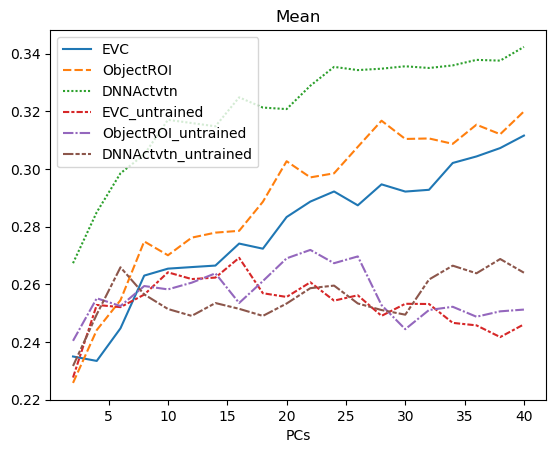

In [16]:
import matplotlib.pyplot as plt

sns.lineplot(data= allvalues[allvalues['Metric'] == 'mean'].iloc[:,0:6]).set_title('Mean')
plt.savefig(figurepath + "Mean.png")

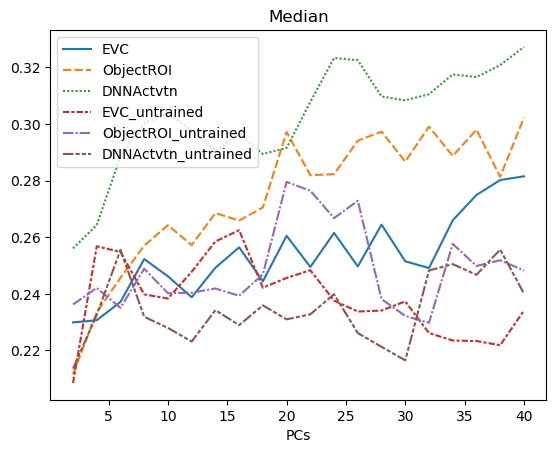

In [17]:
sns.lineplot(data= allvalues[allvalues['Metric'] == 'median'].iloc[:,0:6]).set_title('Median')
plt.savefig(figurepath + "Median.png")

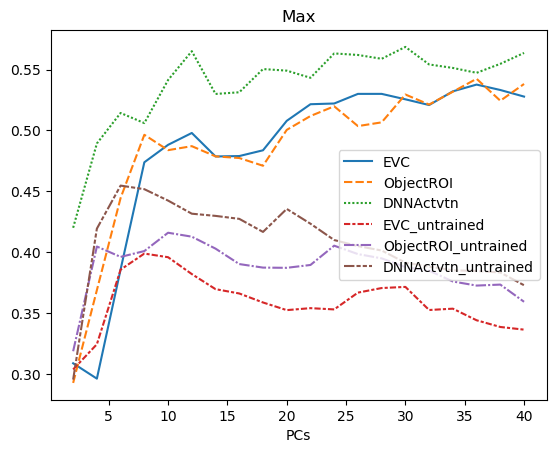

In [18]:
sns.lineplot(data= allvalues[allvalues['Metric'] == 'max'].iloc[:,0:6]).set_title('Max')
plt.savefig(figurepath + "Max.png")

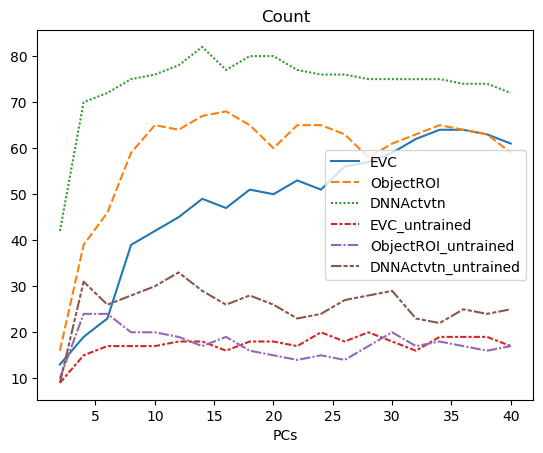

In [20]:
sns.lineplot(data= allvalues[allvalues['Metric'] == 'count'].iloc[:,0:6]).set_title('Count')
plt.savefig(figurepath + "Count.png")

In [21]:
Y_embeddings_subset.shape

(312, 125)

In [ ]:
allvalues[allvalues['Metric'] == 'count'].iloc[:,0:6]